# Historical SnoTel Monthly SWE

In [27]:
def preprocess(df):
    # Fill in missing water year values with 1970
    df['Water Year'].fillna(1970, inplace=True)
    df['Water Year'] = df['Water Year'].astype(int)
    # For each row, only select the SWE column for each month
    df_small = df.iloc[:, [0, 3, 6, 9, 12, 15, 18]].copy()
    df_small.iloc[1:, 1:] = df_small.iloc[1:, 1:].astype(float).fillna(0.0)
    return df_small

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

def plot_swe(df, title):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(18, 18))

    markers = ['o', 's', '^', '+', '<']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Plot stacked lines:
    for i in range(1, df.shape[0]):
        x = range(1, df.shape[1])
        x_new = np.linspace(min(x), max(x), 100)
        y = df.iloc[i, 1:]
        spl = make_interp_spline(x, y, k=3)  # type: BSpline
        y_smooth = spl(x_new)
        ax.plot(x_new, y_smooth, label=df.iloc[i, 0], marker=markers[i % len(markers)], color=colors[i % len(colors)], linewidth=0.5)

    # Set labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('SWE (inches) at the start of the month')
    ax.set_title(title)

    # Add a legend
    ax.legend()

    plt.grid(True)
    # Show the plot
    plt.show()

In [29]:
import pandas as pd

# The data is downloaded from 
# - Paradise: https://wcc.sc.egov.usda.gov/reportGenerator/view/customGroupByMonthReport/monthly/679:wa:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END:1,2,3,4,5,6/WTEQ::collectionDate,SNWD::value,WTEQ::value
# - Stevens Pass: https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customGroupByMonthReport/monthly/791:wa:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END:1,2,3,4,5,6/WTEQ::collectionDate,SNWD::value,WTEQ::value
# - Mf Nooksack: https://wcc.sc.egov.usda.gov/reportGenerator/view/customGroupByMonthReport/monthly/1011:wa:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END:1,2,3,4,5,6/WTEQ::collectionDate,SNWD::value,WTEQ::value
# - Rainy Pass: https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customGroupByMonthReport/monthly/711:wa:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END:1,2,3,4,5,6/WTEQ::collectionDate,SNWD::value,WTEQ::value
# - Olallie Meadows: https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customGroupByMonthReport/monthly/672:wa:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END:1,2,3,4,5,6/WTEQ::collectionDate,SNWD::value,WTEQ::value
# Replace 'path/to/file.csv' with the actual path to your CSV file
df_stevens = preprocess(pd.read_csv('stevens_pass.csv'))
df_paradise = preprocess(pd.read_csv('paradise.csv'))
df_mf_nooksack = preprocess(pd.read_csv('mf_nooksack.csv'))
df_rainy_pass = preprocess(pd.read_csv('rainy_pass.csv'))
df_olallie = preprocess(pd.read_csv('olallie_meadows.csv'))




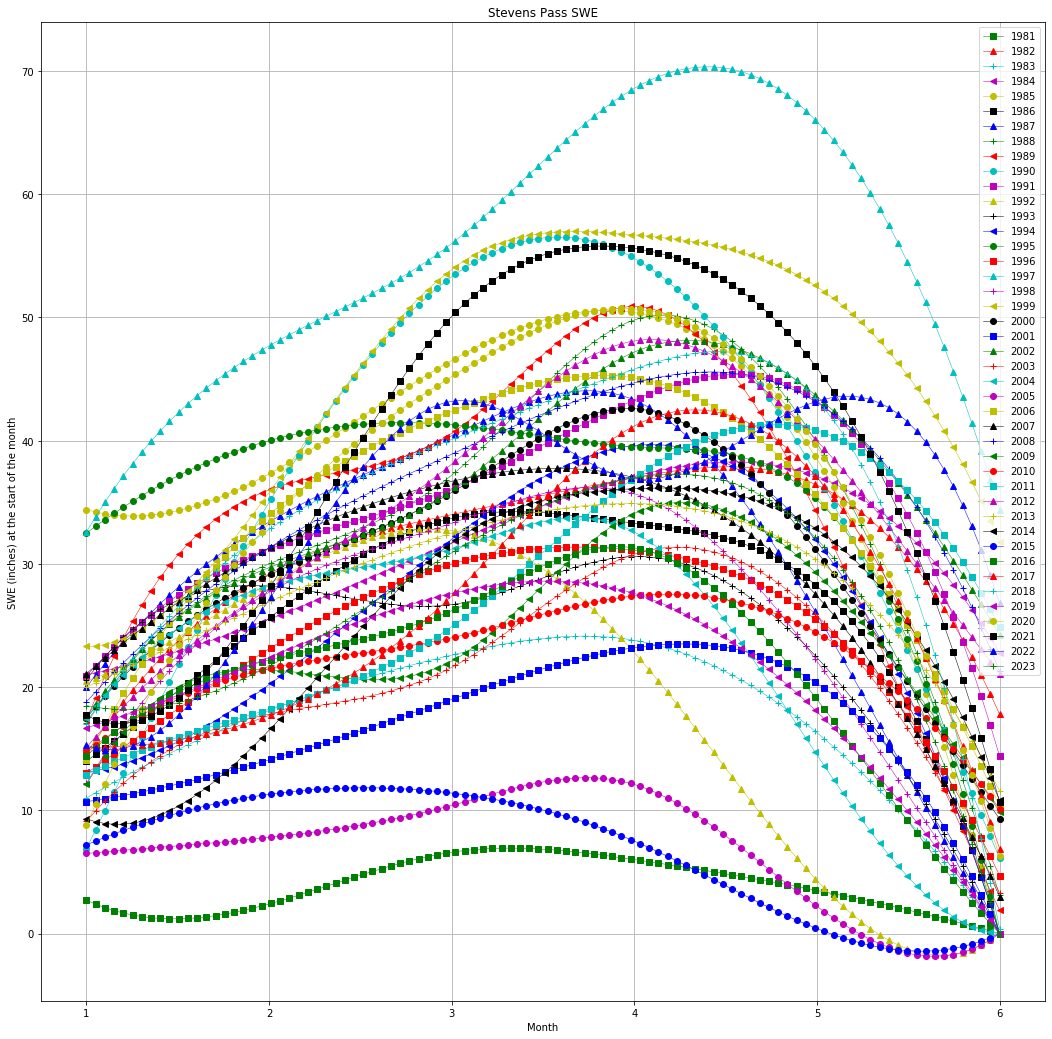

In [30]:
plot_swe(df_stevens, 'Stevens Pass SWE')

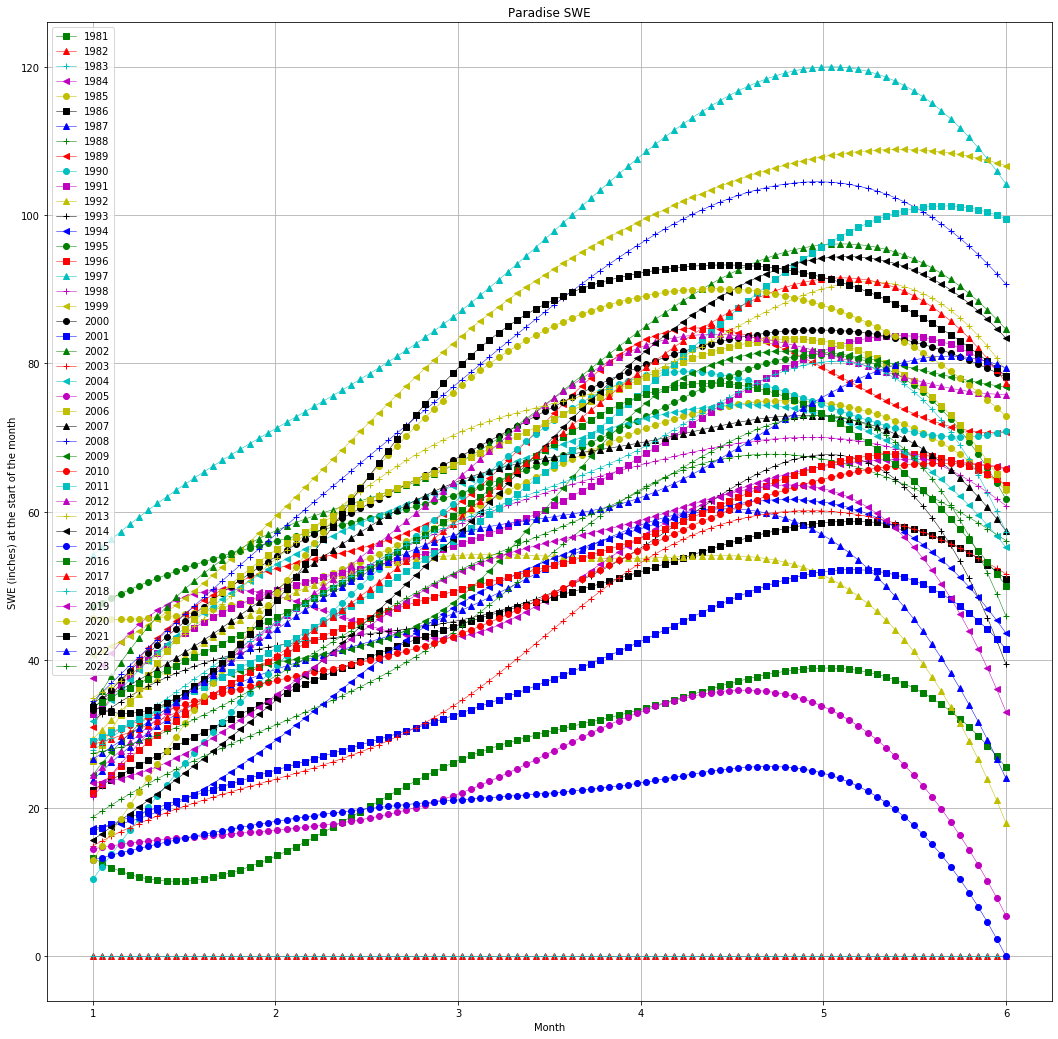

In [31]:
plot_swe(df_paradise, 'Paradise SWE')